In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import astropy
from astroquery.skyview import SkyView
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u

In [3]:
hdu = fits.open("../data/2MASS_XSC.fits")

In [4]:
hdu.info()

Filename: ../data/2MASS_XSC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    134   1646844R x 48C   [17A, D, D, D, D, D, D, E, E, E, E, K, E, E, K, E, E, K, E, E, E, E, E, E, E, E, E, E, K, E, K, E, K, E, E, K, E, E, K, E, K, E, K, E, E, K, K, L]   


In [5]:
data = hdu[1].data

In [6]:
data.columns

ColDefs(
    name = 'designation'; format = '17A'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'sup_ra'; format = 'D'; unit = 'deg'
    name = 'sup_dec'; format = 'D'; unit = 'deg'
    name = 'l'; format = 'D'; unit = 'deg'
    name = 'b'; format = 'D'; unit = 'deg'
    name = 'stardensity'; format = 'E'
    name = 'ak_schlegel'; format = 'E'
    name = 'j_m_k20fe'; format = 'E'; unit = 'mag'
    name = 'j_msig_k20fe'; format = 'E'; unit = 'mag'
    name = 'j_flg_k20fe'; format = 'K'
    name = 'h_m_k20fe'; format = 'E'; unit = 'mag'
    name = 'h_msig_k20fe'; format = 'E'; unit = 'mag'
    name = 'h_flg_k20fe'; format = 'K'
    name = 'k_m_k20fe'; format = 'E'; unit = 'mag'
    name = 'k_msig_k20fe'; format = 'E'; unit = 'mag'
    name = 'k_flg_k20fe'; format = 'K'
    name = 'j_m_ext'; format = 'E'; unit = 'mag'
    name = 'j_msig_ext'; format = 'E'; unit = 'mag'
    name = 'h_m_ext'; format = 'E'; unit = 'mag'
    name = 'h_msig

In [7]:
np.argmin( np.abs(data['j_m_k20fe'] - 11.2) )

164825

(array([ 321.,  435.,  625.,  706., 1045., 1287., 1627., 2101., 2794.,
        3651.]),
 array([10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. ],
       dtype=float32),
 <a list of 10 Patch objects>)

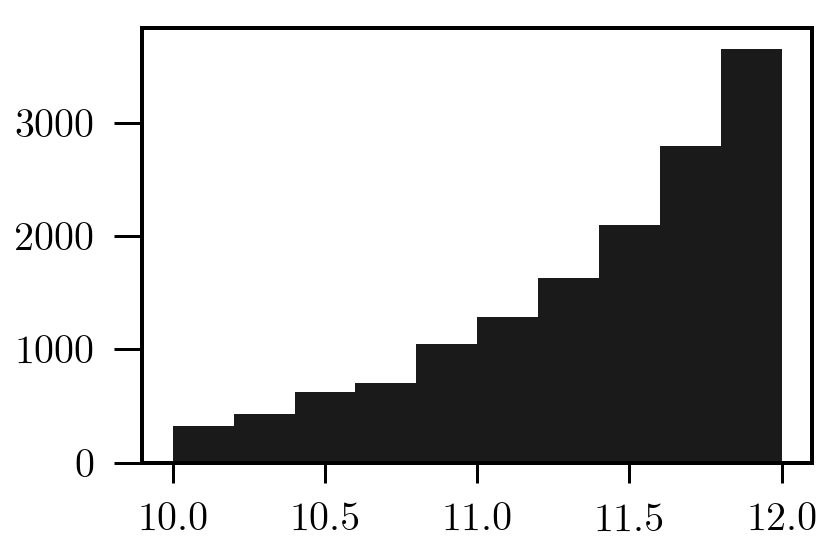

In [8]:
plt.hist(data['j_m_k20fe'], range=(10,12))

In [9]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [10]:
inds = np.arange(len(data['j_m_k20fe']))
inds = inds[ np.logical_and(data['j_m_k20fe'] > 11, data['j_m_k20fe'] < 11.5) ]
inds = inds[:100]
chunklist = list(chunks( inds, 3 ))

In [12]:
def plot_row( three_indices ):
    fig = plt.figure(figsize=(12,4))

    for fig_i, i in enumerate(three_indices):

        ra0, dec0 = data['ra'][i], data['dec'][i]
        c = SkyCoord(ra=ra0*u.degree, dec=dec0*u.degree, frame='icrs')
        # Retrieve M83 2MASS K-band image:
        images = SkyView.get_images(position=c, survey=['2MASS-J'],
                                        pixels=50, scaling="Log")

        hdu_im = images[0][0]
        im = hdu_im.data.copy()
        im[im < 0] = 0
        wcs = WCS(hdu_im.header)
        ax = fig.add_subplot(1, 3, fig_i+1, projection=wcs)  # create an axes object in the figure
        ax.imshow( im , origin='lower', vmax=np.mean(im) + 1*np.std(im))
        ax.grid(color='white', ls='solid')

        amp = 5 * (1-data['j_ba'][i])
        phi_x = -amp * np.cos((90-data['j_phi'][i]) * np.pi / 180)
        phi_y = amp * np.sin((90-data['j_phi'][i]) * np.pi / 180)
        ax.arrow(49 / 2, 49 / 2, dx=phi_x, dy=phi_y, color="black", lw=3, head_width=1, alpha=0.6 )
        phi_x = -amp * np.cos((90-data['k_phi'][i]) * np.pi / 180)
        phi_y = amp * np.sin((90-data['k_phi'][i]) * np.pi / 180)
        ax.arrow(49 / 2, 49 / 2, dx=phi_x, dy=phi_y, color="red", lw=3, head_width=1, alpha=0.6 )

    #     ax.set_xlabel('Galactic Longitude')
    #     ax.set_ylabel('Galactic Latitude')

    # ax = fig.add_subplot(1, 4, 4)  # create an axes object in the figure
    ax.plot([],[],'k-', label=r"j_phi")
    ax.plot([],[],'r-', label=r"k_phi")
    ax.legend(loc="upper right", frameon=True, fancybox=False, framealpha=1.0)

    plt.tight_layout()

In [12]:
chunklist[4]

array([6850, 7314, 7551])

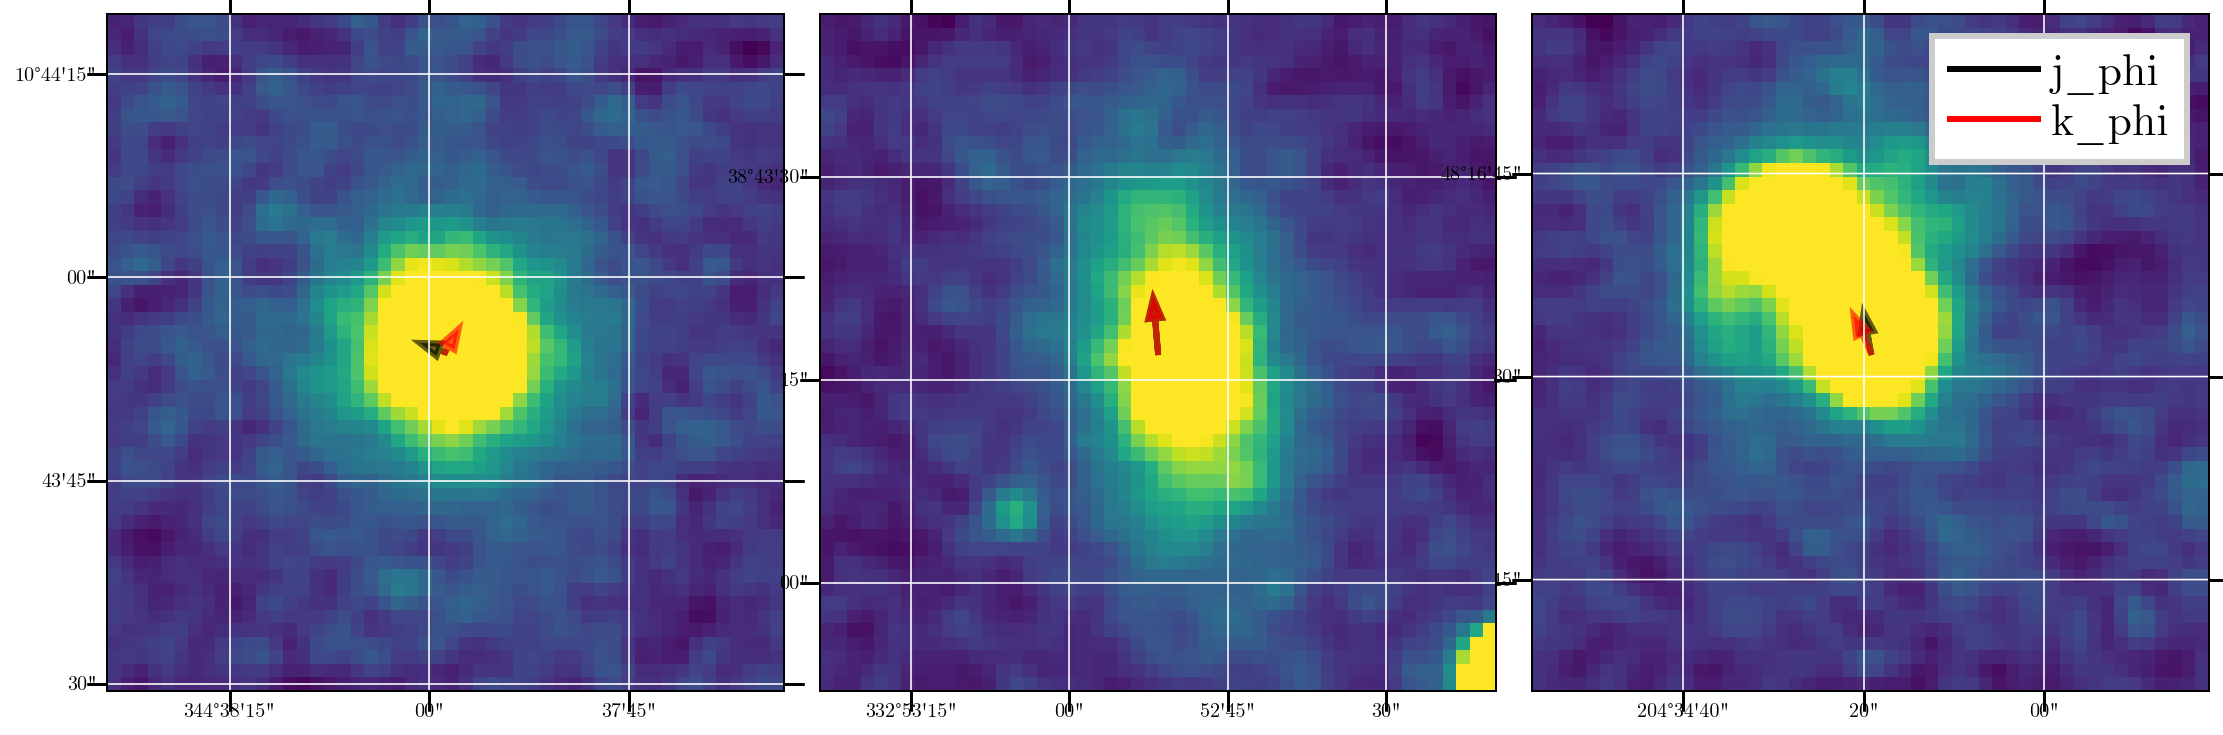

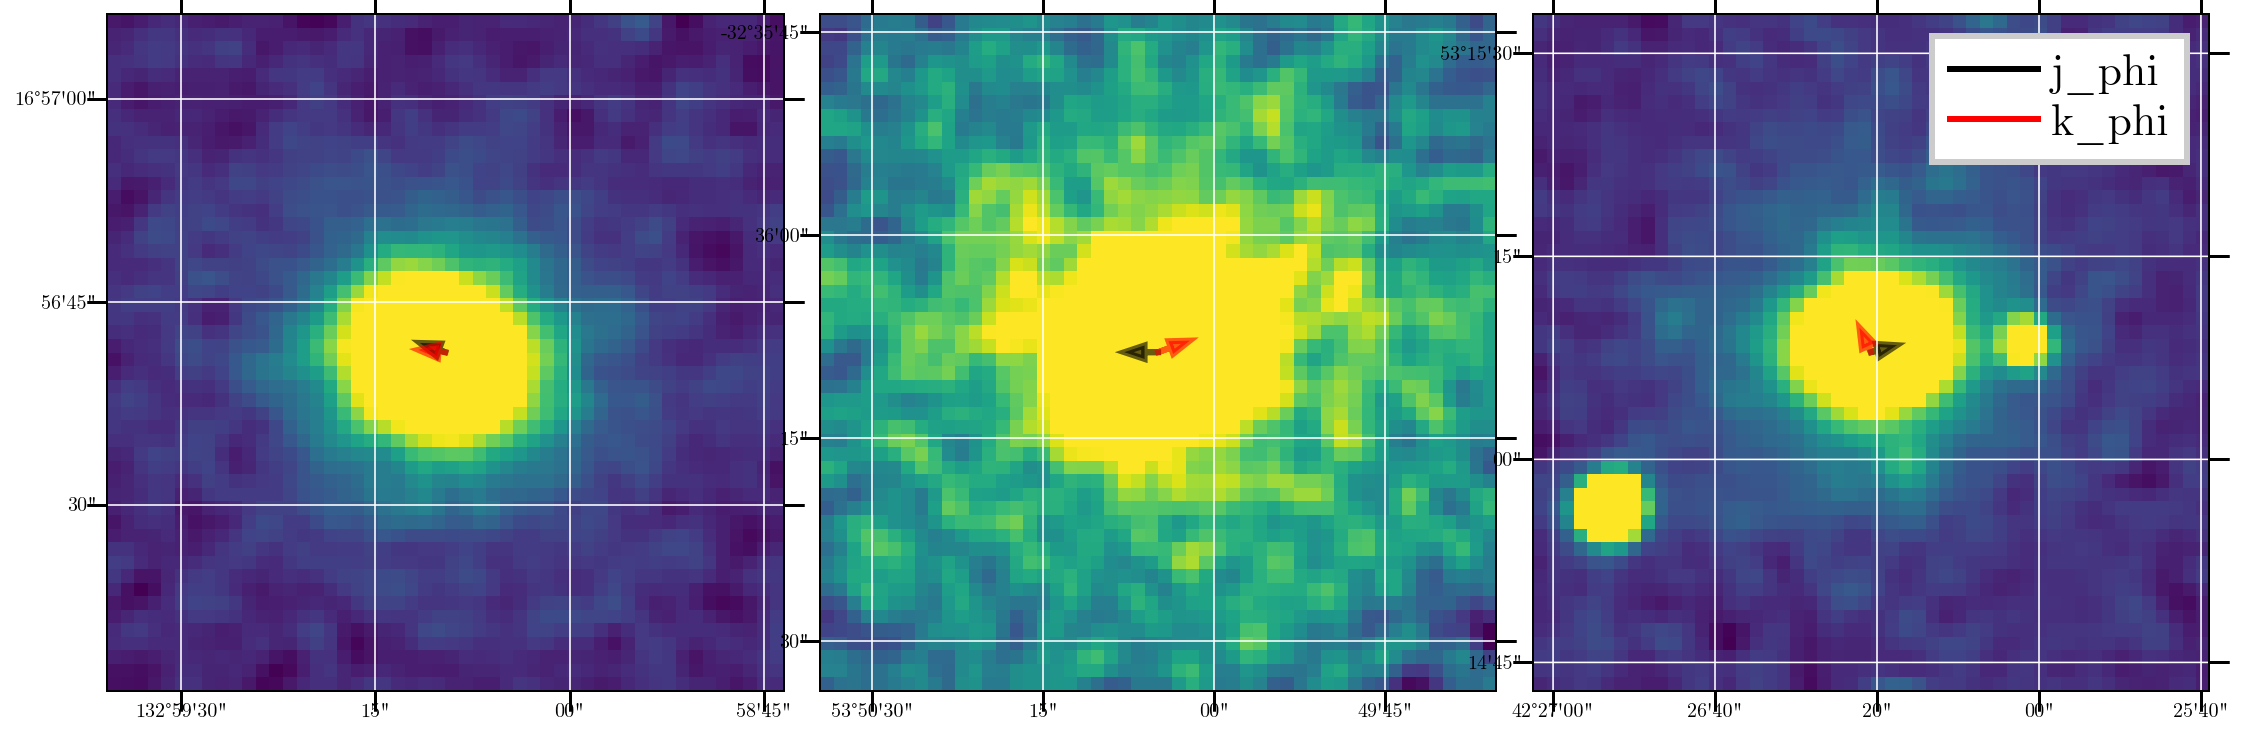

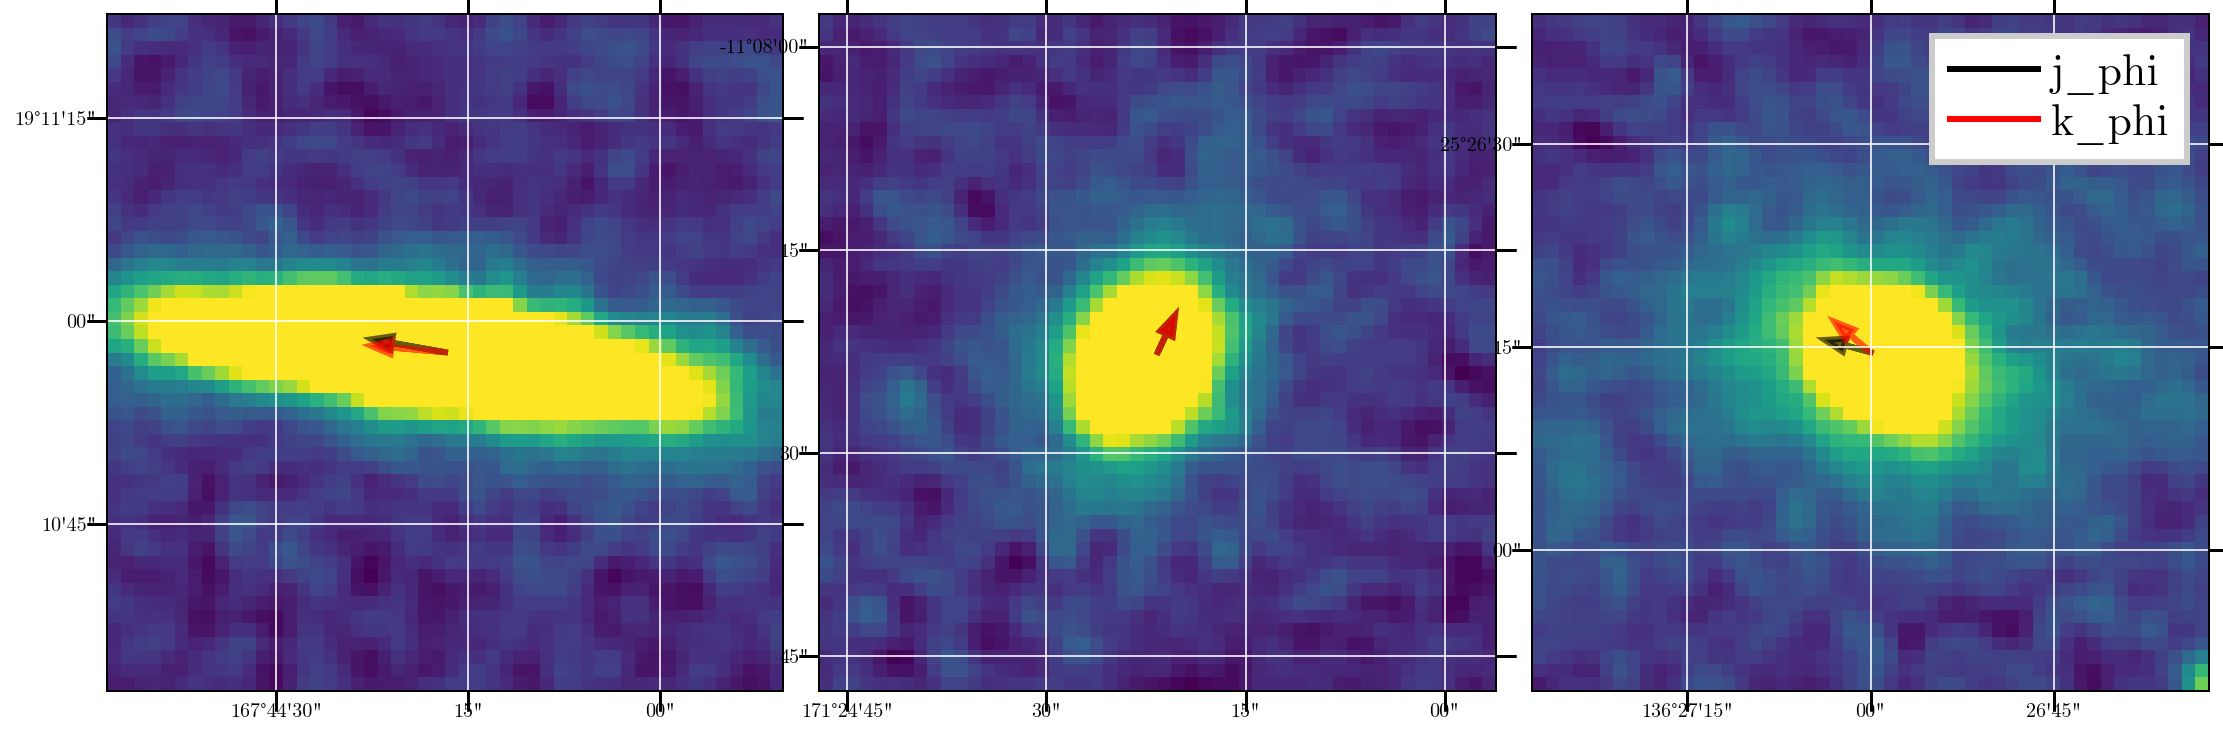

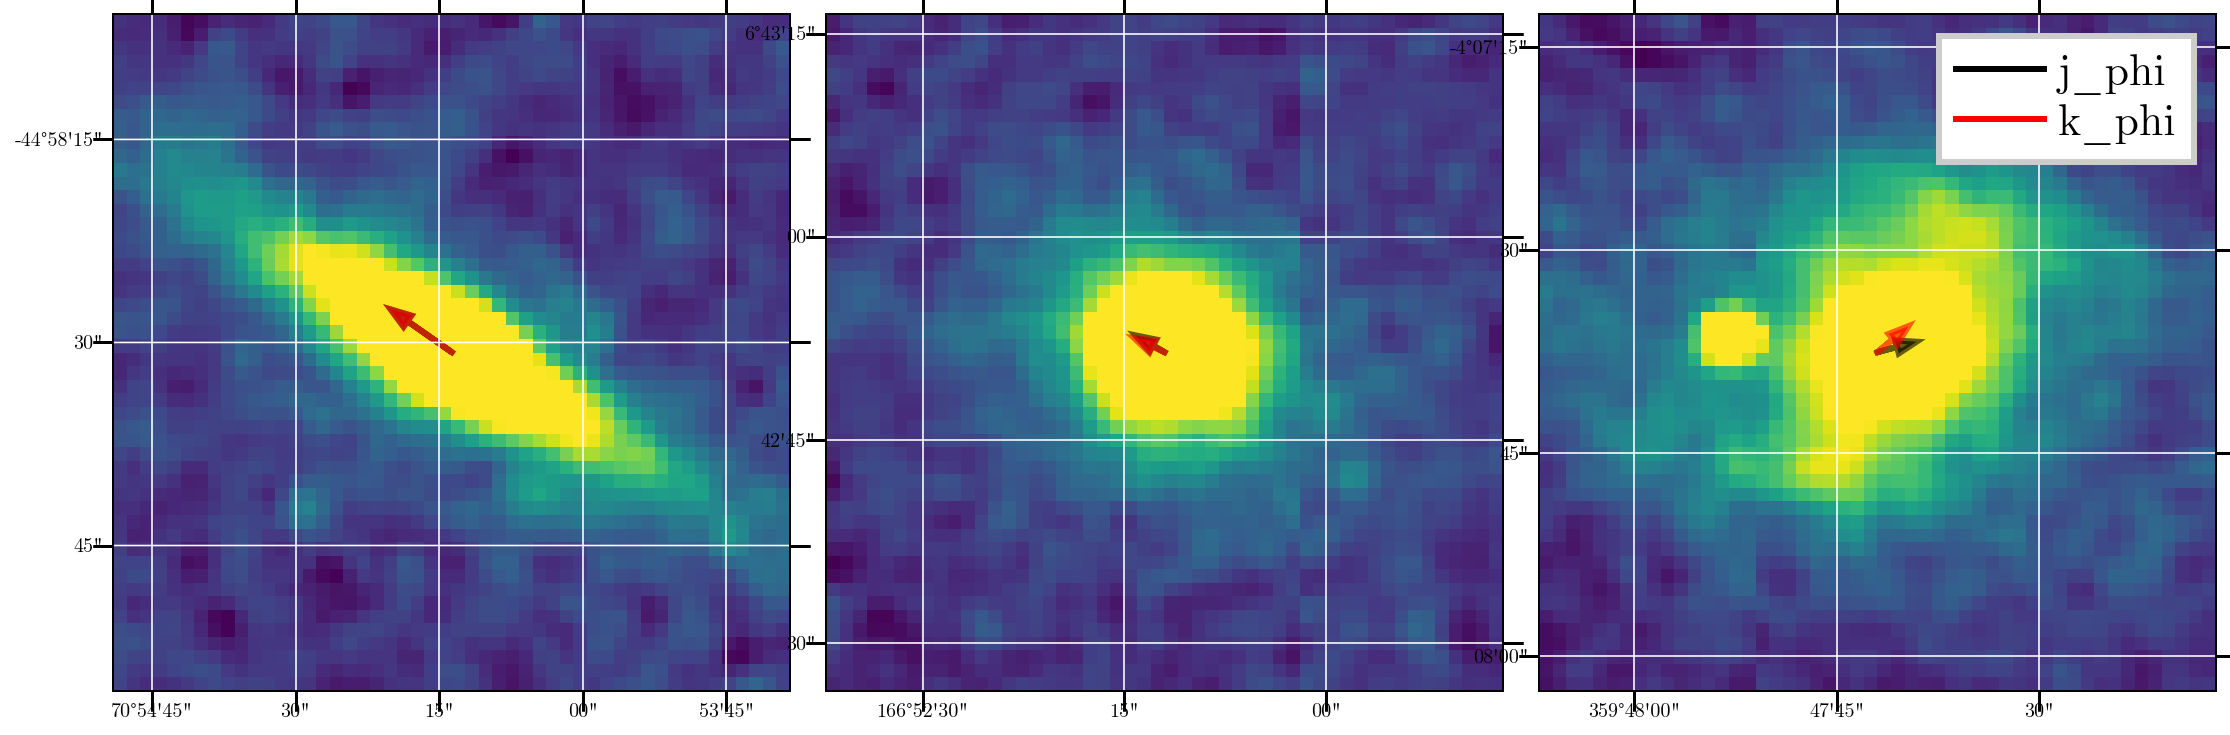

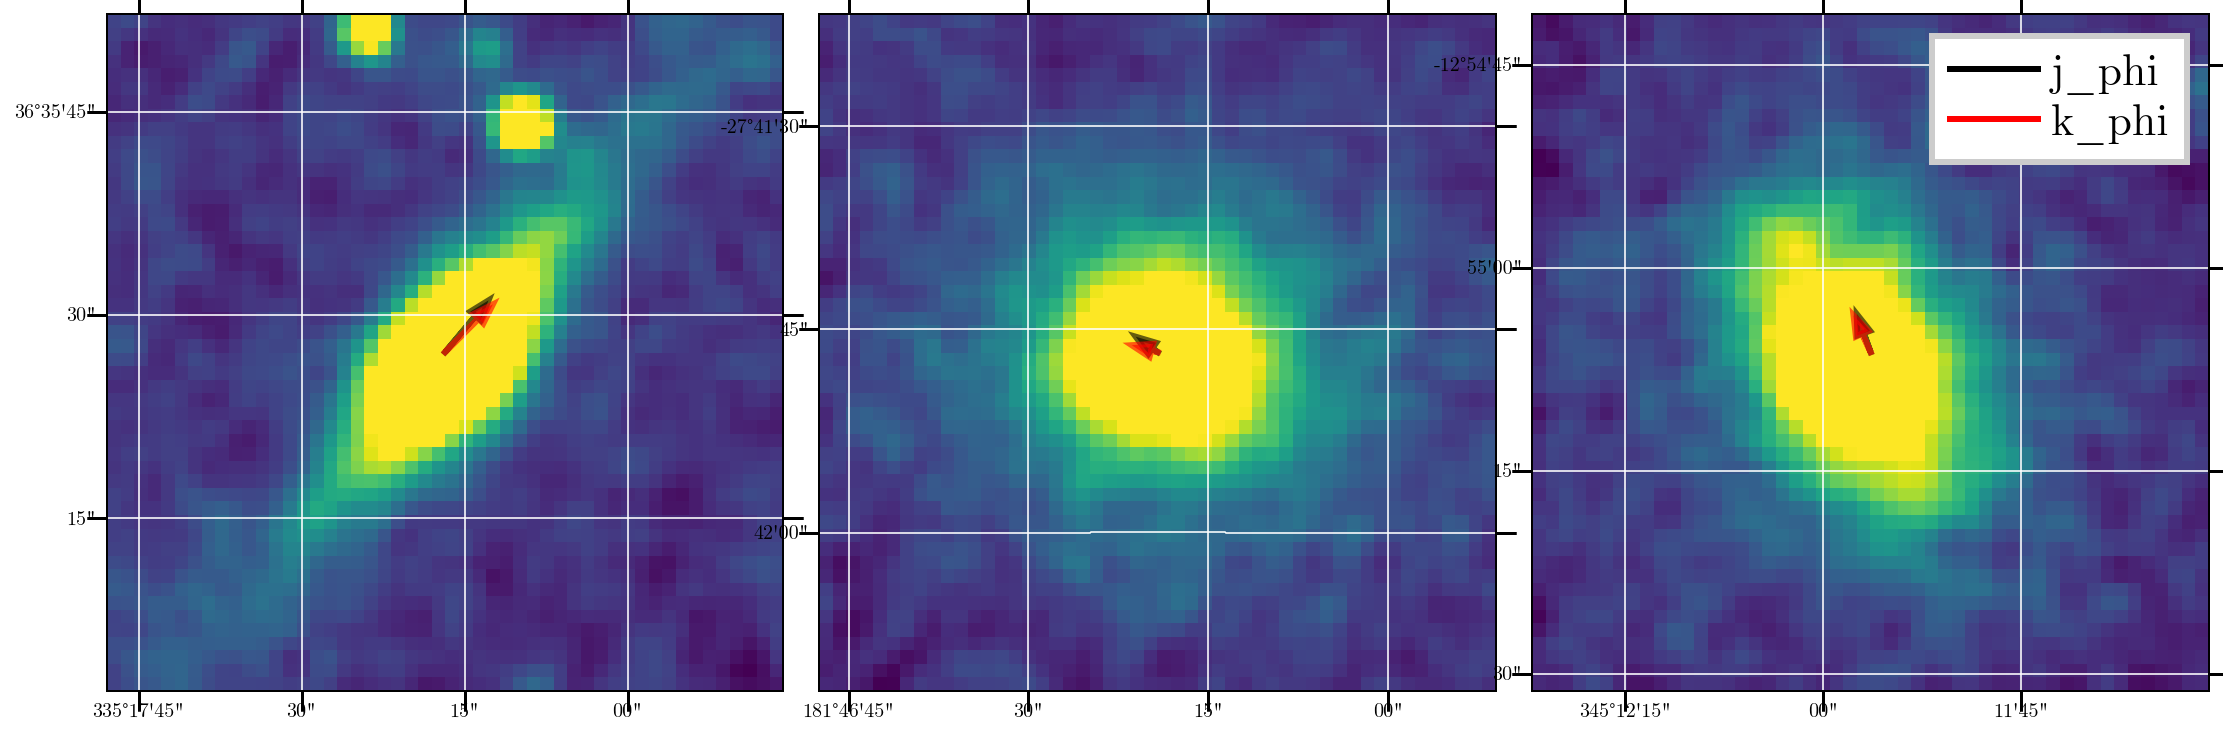

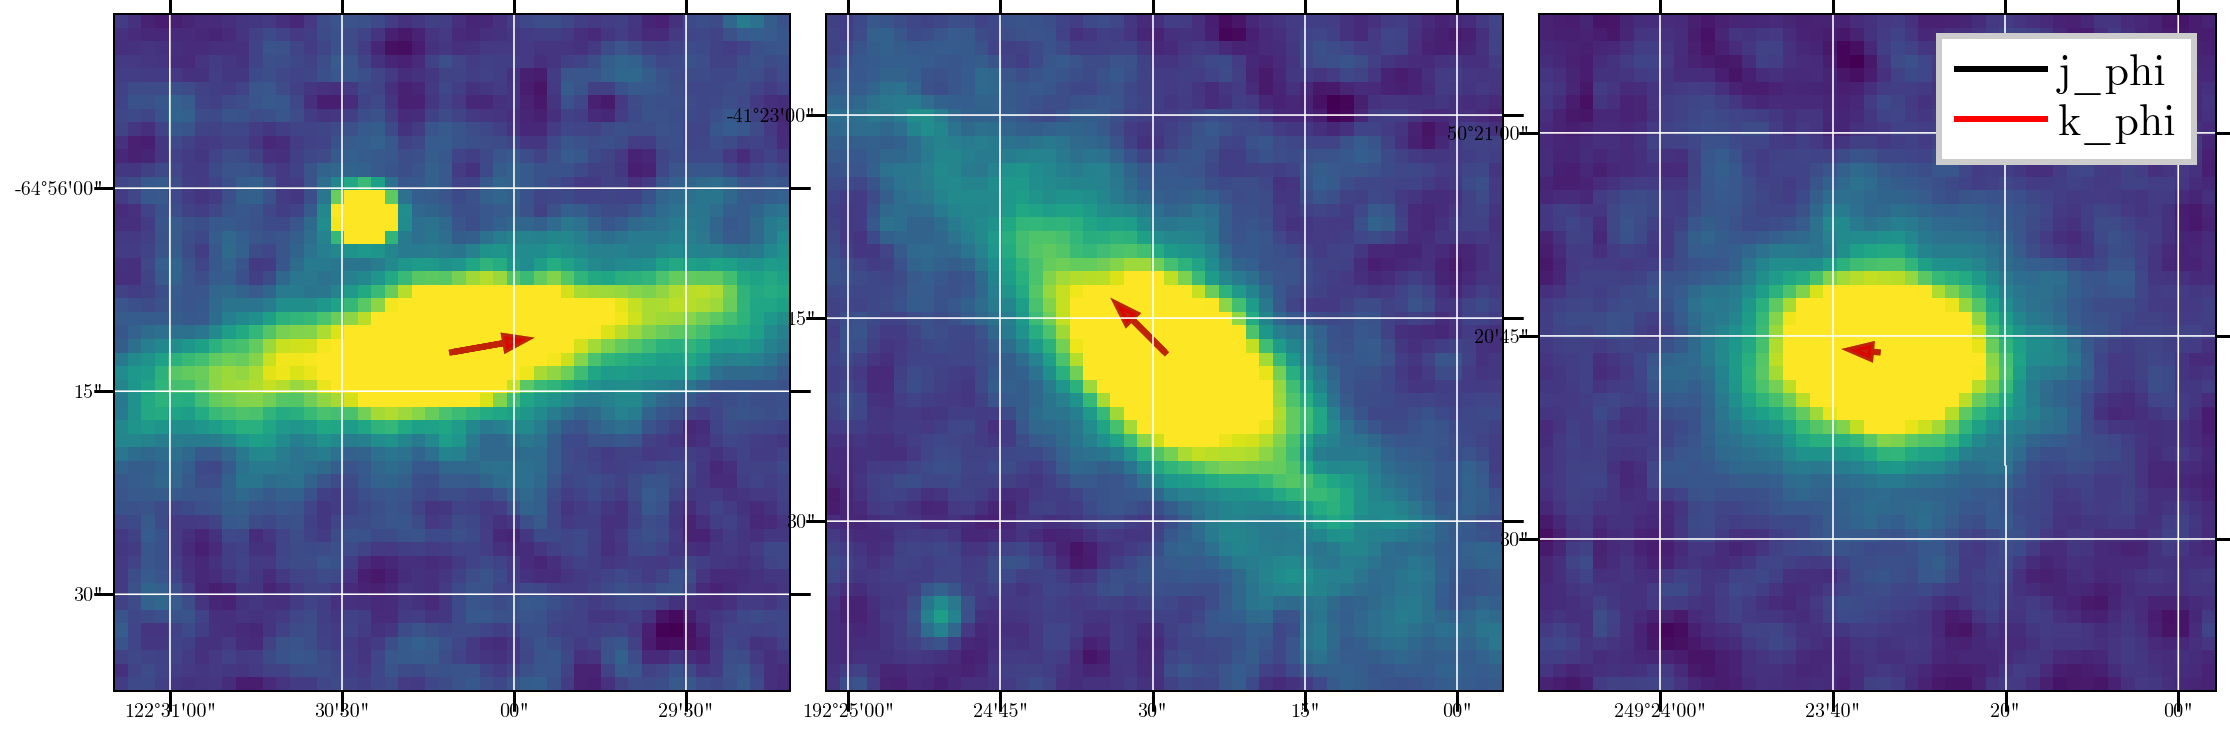

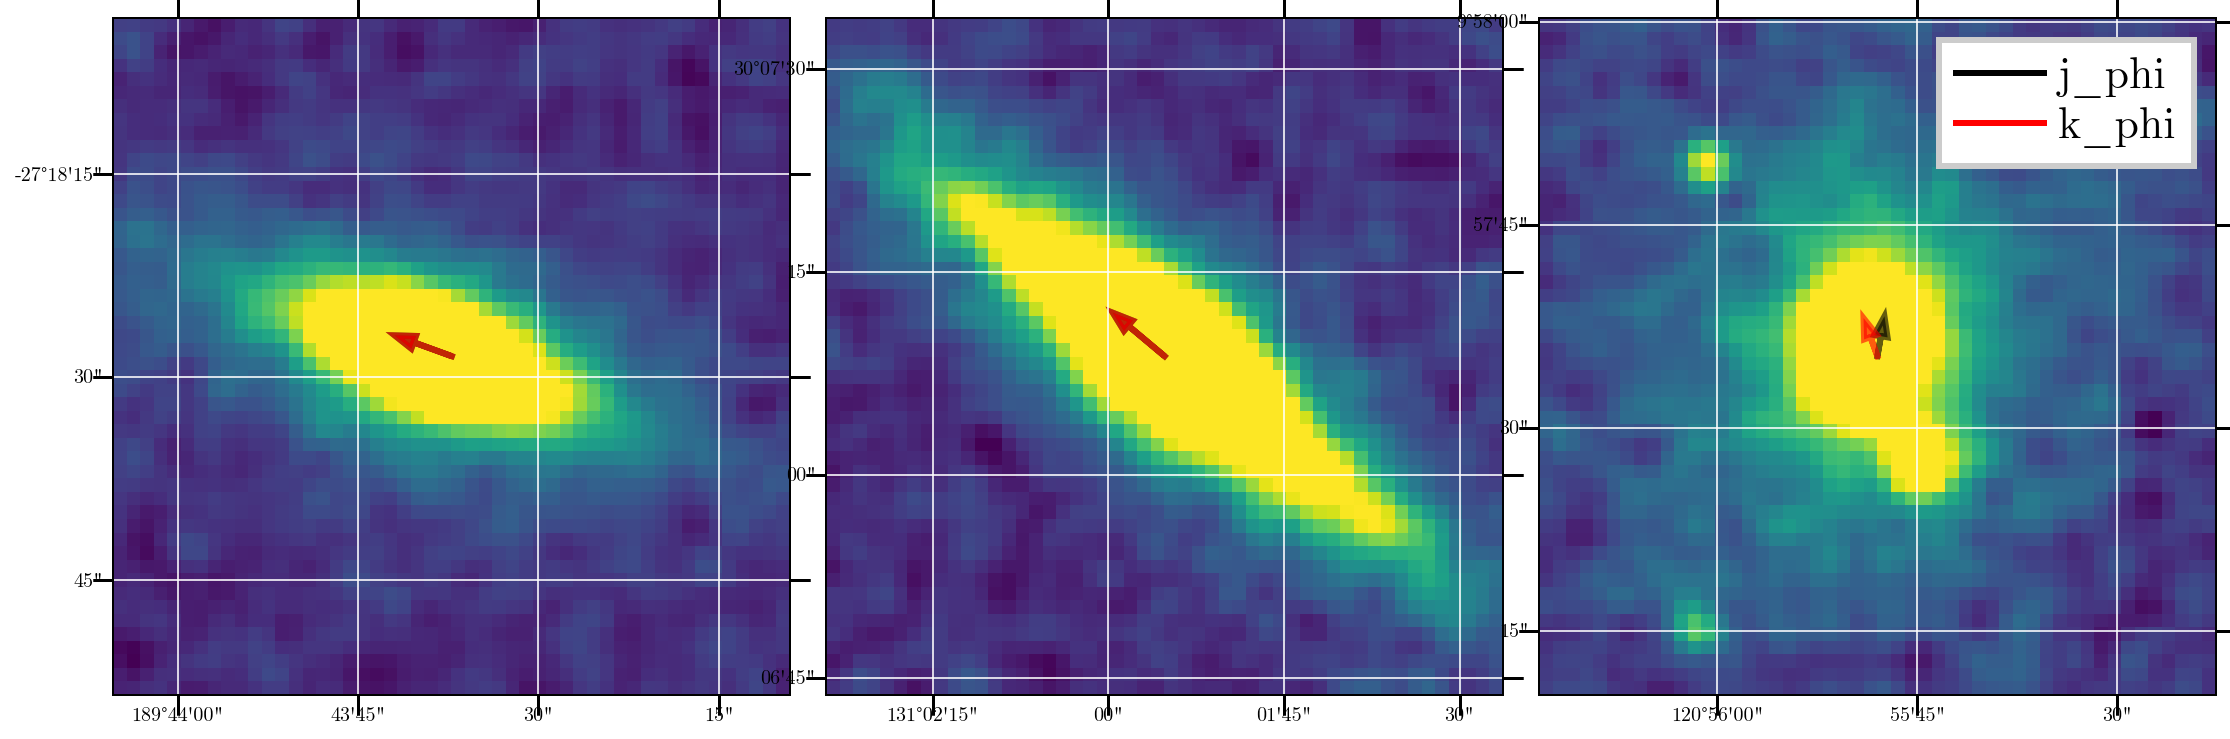

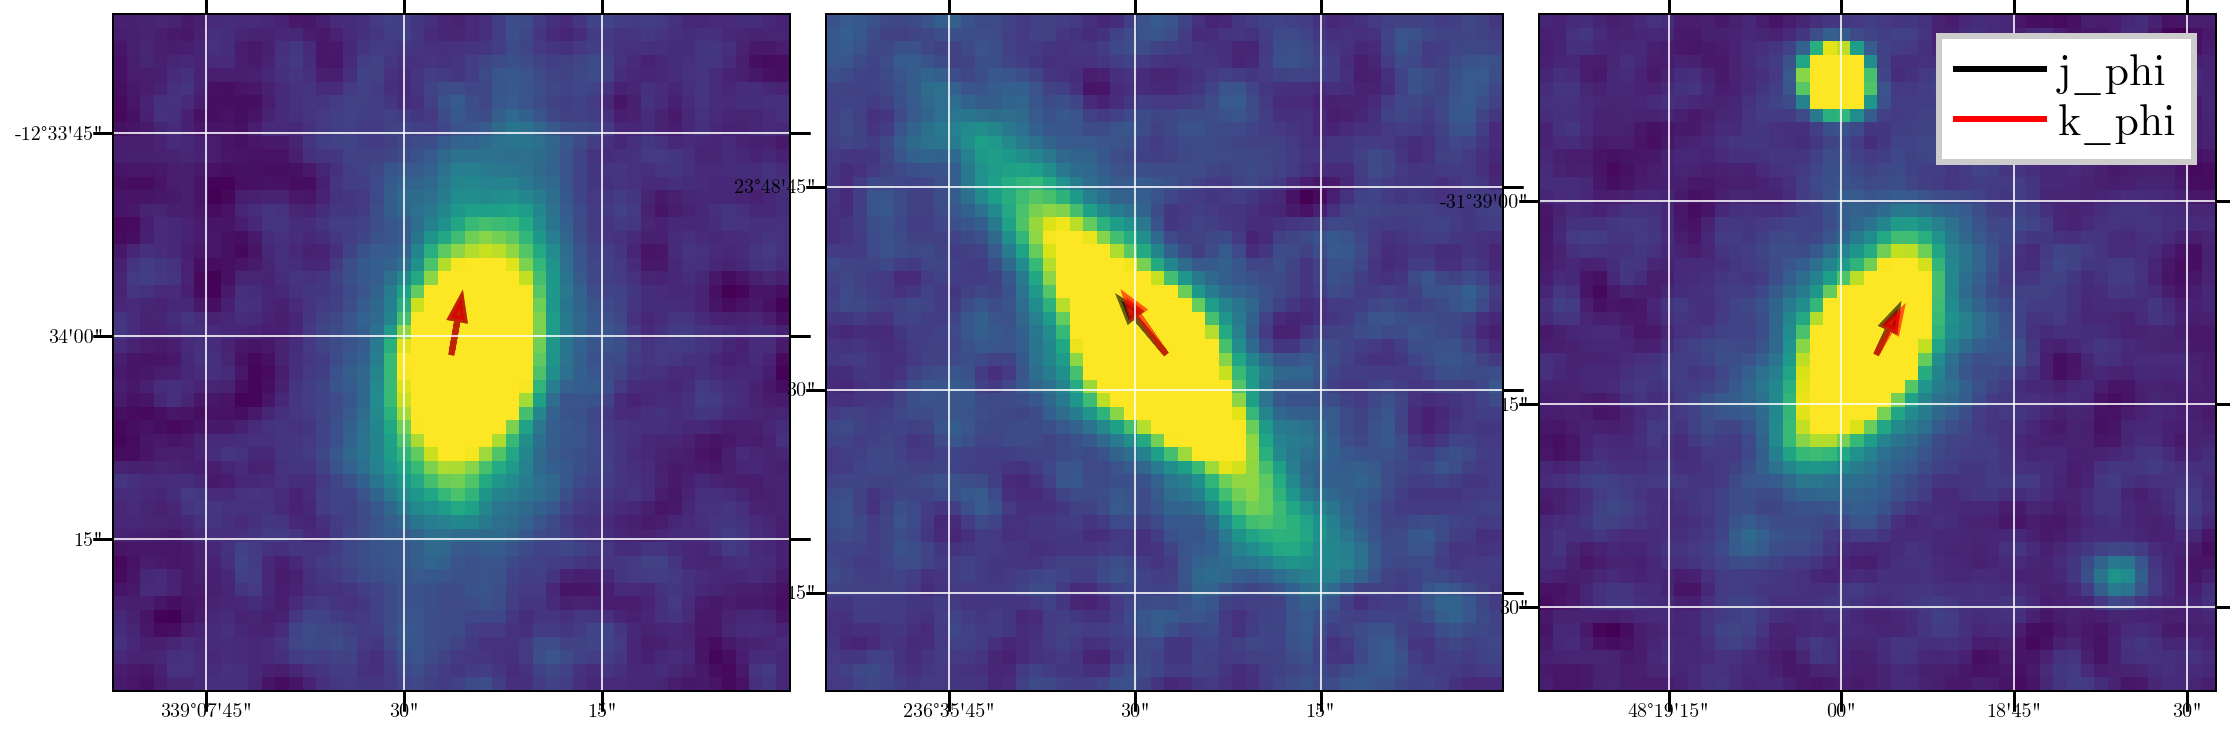

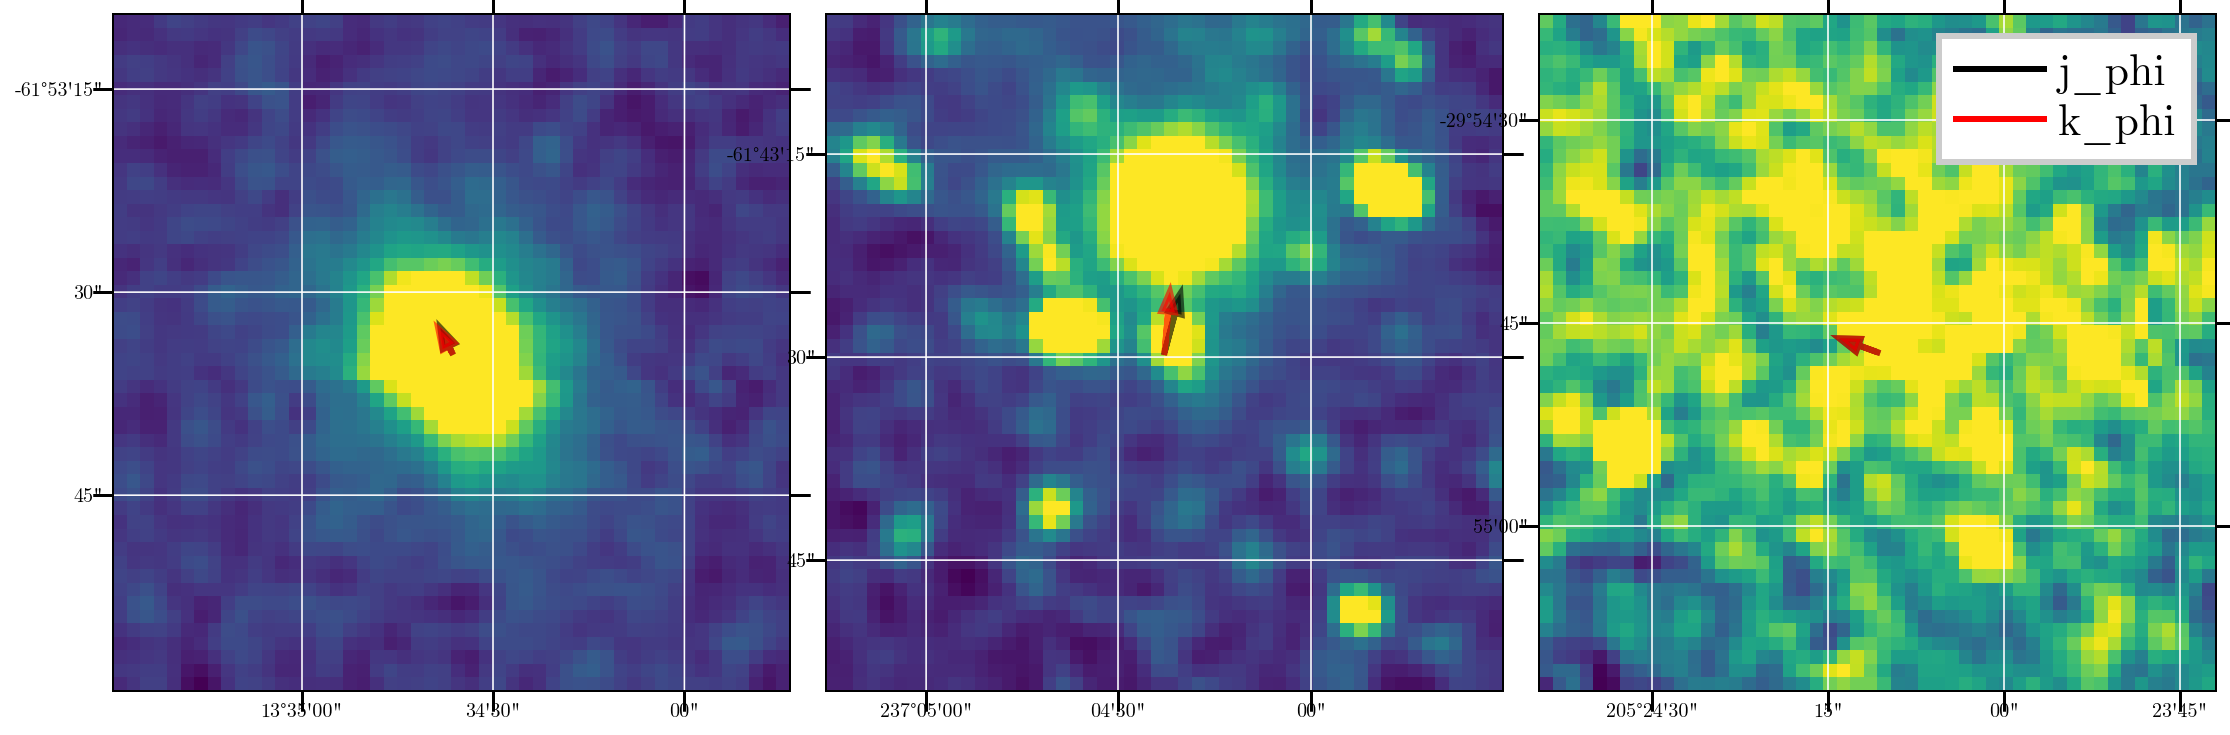

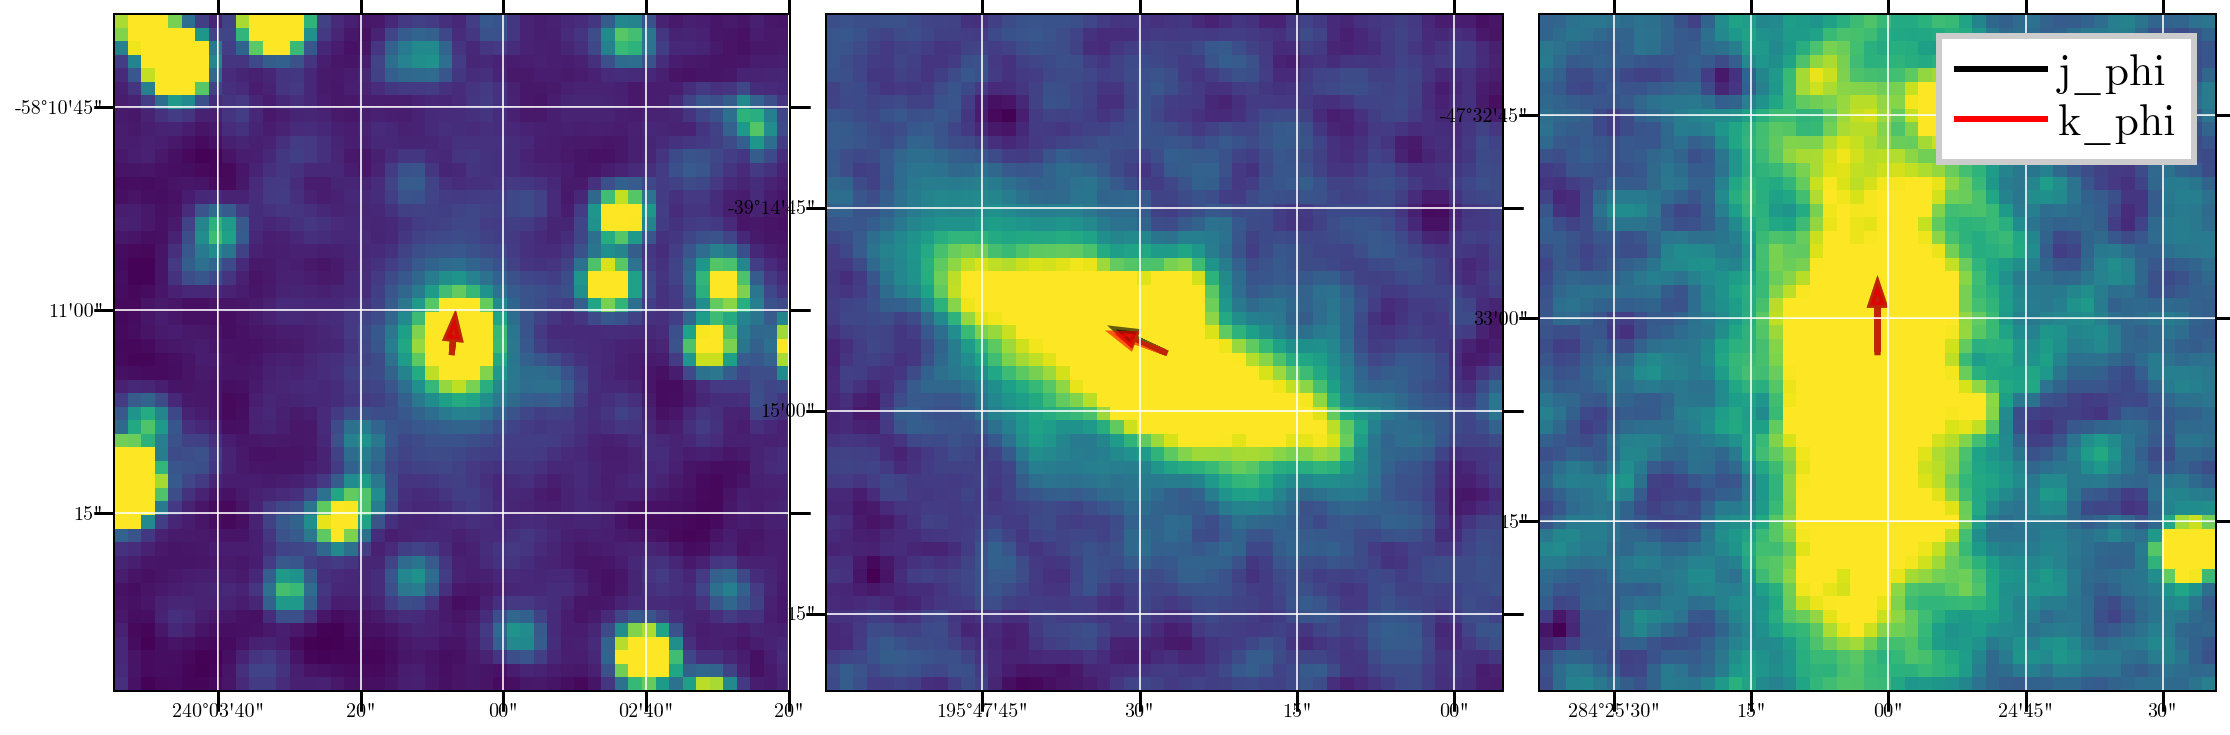

In [298]:
for chunk_i in range(10):
    plot_row(chunklist[chunk_i])

In [240]:
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(1, 1, 1, projection=wcs)  # create an axes object in the figure
# ax.imshow( im , origin='lower', vmax=np.mean(im) + 1.5*np.std(im))

# amp = 5
# jphi_x = amp * np.cos(data['j_phi'][164825] * np.pi / 180)
# jphi_y = amp * np.sin(data['j_phi'][164825] * np.pi / 180)
# ax.arrow(49 / 2, 49 / 2, dx=jphi_x, dy=jphi_y, color="black" )

(array([9.14140e+04, 1.09066e+05, 1.17499e+05, 9.71160e+04, 9.49550e+04,
        1.03553e+05, 1.53182e+05, 1.00240e+05, 7.79814e+05, 5.00000e+00]),
 array([-89. , -68.4, -47.8, -27.2,  -6.6,  14. ,  34.6,  55.2,  75.8,
         96.4, 117. ]),
 <a list of 10 Patch objects>)

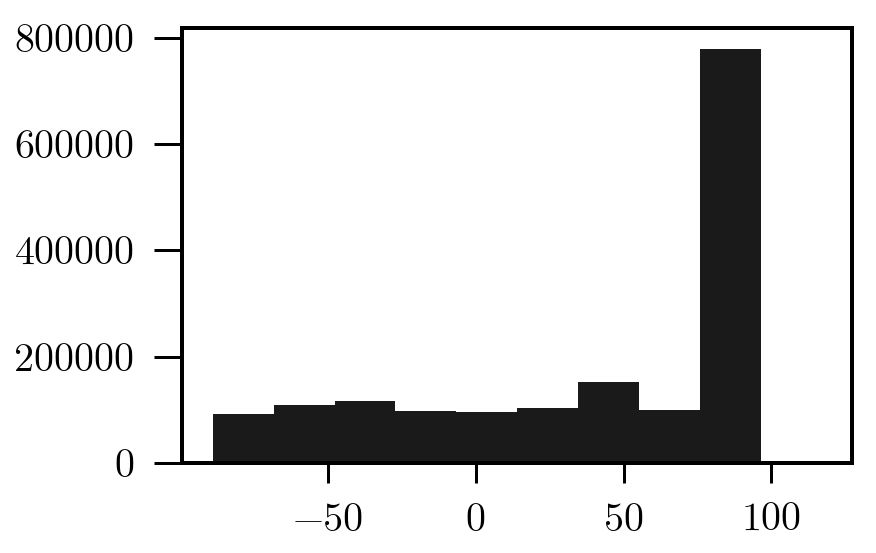

In [230]:
plt.hist( data['j_phi'] )